In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Teoría

#### Modelo de Burguer
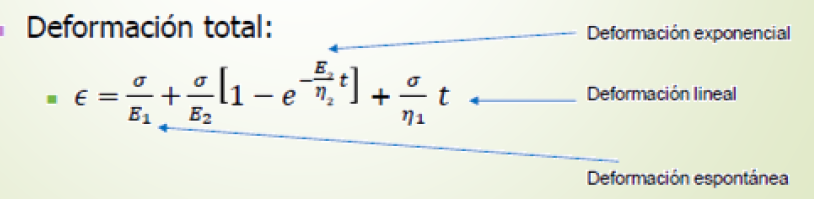

#### Modelo de Kelvin-v en recuperación
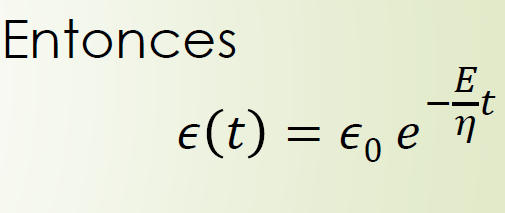

#### OOP PARA ELEMENTOS SEGÚN MODELO DE BURGUER

In [2]:
class spring:
    def __init__(self,E):
        self.E=E
    def get_defo(self,sigma):
        return sigma/self.E
class piston:
    def __init__(self,visc):
        self.visc=visc
    def get_defo(self,sigma,t):
        return (sigma/self.visc)*t
class kelvin:
    def __init__(self,E,visc):
        self.E=E
        self.visc=visc
    def get_defo(self,sigma,t):
        return (sigma/self.E)*(1-np.exp(-((self.E/self.visc)*t)))
    def get_rec(self,def_0,t):
        return def_0*np.exp(-(self.E/self.visc)*t)

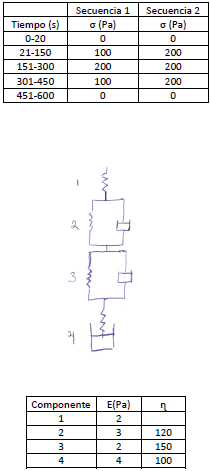

In [3]:
#Definir datos dados
#serie de tiempo
time_series=range(0,600+1)
#constantes del elemento de  Kelvin-Voight
E_2=3
E_3=2
visc_2=120
visc_3=150
#constantes del elemento resorte 1
spring_1_E=2
#constantes resorte dos 
visc_4=100
E_4=4


#### Secuencia 1

In [4]:
#definir objetos de los elementos
#resorte 1
spring_1=spring(spring_1_E)
# elem de eklvin 1
kelvin_2=kelvin(E_2,visc_2)
# elem de kelvin 2
kelvin_3=kelvin(E_3,visc_3)
#embolo 4
piston_4=piston(visc_4)
#resorte 4
spring_4=spring(E_4)

In [5]:
#definir vectores de deformación en casa segundo(a llenar)
elem_1=np.array([]) #resorte 1
elem_2=np.array([]) #kelvin 1 
elem_3=np.array([]) #kelvin 3
elem_4=np.array([]) #resorte 4
elem_5=np.array([]) #piston 4
total=np.array([])

In [6]:
counter_1=1
counter_2=1
counter_3=1
counter_4=1
for s in time_series:
    if 20>=s>=0:
        sigma=0
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,kelvin_2.get_defo(sigma,s))
        elem_3=np.append(elem_3,kelvin_3.get_defo(sigma,s))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,piston_4.get_defo(sigma,s))
        #captrura últimos valores de los elementos requeridos
        if s==20:
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
    elif 150>=s>=21:
        sigma=100
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,last_2+kelvin_2.get_defo(sigma,counter_1)) #suma la deformación hasta 20s
        elem_3=np.append(elem_3,last_3+kelvin_3.get_defo(sigma,counter_1))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,last_5+piston_4.get_defo(sigma,counter_1))        
        if s==150:
            #captrura últimos valores de los elementos requeridos
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
            defo_150_elem_2=elem_2[-1]
            defo_150_elem_3=elem_3[-1]
        counter_1+=1  
    elif 300>=s>=151:
        sigma=200
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,last_2+kelvin_2.get_defo(sigma,counter_2)) #suma la deformación hasta 150s
        elem_3=np.append(elem_3,last_3+kelvin_3.get_defo(sigma,counter_2))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,last_5+piston_4.get_defo(sigma,counter_2))
        
        if s==300:
            #captrura últimos valores de los elementos requeridos
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
            defo_300_elem_2=elem_2[-1]#capturar del valor de la defromación de elemento kelvin en otra variable, para posteriormente 
                                       #usarlo en recuperación.
            defo_300_elem_3=elem_3[-1]
        counter_2+=1   
    elif 450>=s>=301: #aquí empieza la recuperación entonces el de maxwell no recupera(def cte), para el de kelvin
                    #cambia el modelo a modo recuperación,resorte recupera instantaneo
        sigma=100
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        #Deformación inicial para elemento 23 es la diferencia entre la deformación hasta 300s y la que tenía en 150 
        def_0_elem_2=defo_300_elem_2-defo_150_elem_2
        def_0_elem_3=defo_300_elem_3-defo_150_elem_3
        
        elem_2=np.append(elem_2,defo_150_elem_2+kelvin_2.get_rec(def_0_elem_2,counter_3)) #suma la deformación hasta 300s
        elem_3=np.append(elem_3,defo_150_elem_3+kelvin_3.get_rec(def_0_elem_3,counter_3))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,last_5+piston_4.get_defo(sigma,counter_3))
        if s==450:
            #captrura últimos valores de los elementos requeridos
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
        counter_3+=1    
    elif 600>=s>=451:
        sigma=0     
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        #Deformación inicial para elemento 23 es la que tenía en 450s
        elem_2=np.append(elem_2,kelvin_2.get_rec(last_2,counter_4)) #El piso es 0, no necesita sumar un PISO
        elem_3=np.append(elem_3,kelvin_3.get_rec(last_3,counter_4)) 
        
        elem_4=np.append(elem_4,spring_4.get_defo(sigma)) #se mantiene constante en el valor de la 
        elem_5=np.append(elem_5,last_5)    #deformación del émbolo cuando sigma es 0,  por que el émbolo no recupera, el resorte
                                           #recupera su longitud incial o sea no hay strain cuando sigma es 0

        counter_4+=1
#obtener el total a partir de la suma de deformaciones
total=elem_1+elem_2+elem_3+elem_4+elem_5

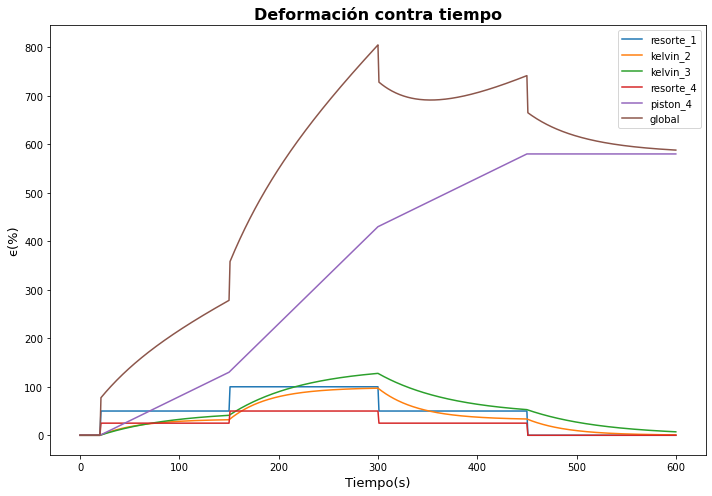

In [7]:
#Graficar 
plt.figure(figsize=(10,7))
plt.plot(time_series,elem_1,label="resorte_1")
plt.plot(time_series,elem_2,label="kelvin_2")
plt.plot(time_series,elem_3,label="kelvin_3")
plt.plot(time_series,elem_4,label="resorte_4")
plt.plot(time_series,elem_5,label="piston_4")
plt.plot(time_series,total,label="global")

plt.legend(loc='upper right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.tight_layout()
plt.show()

### Profe solución
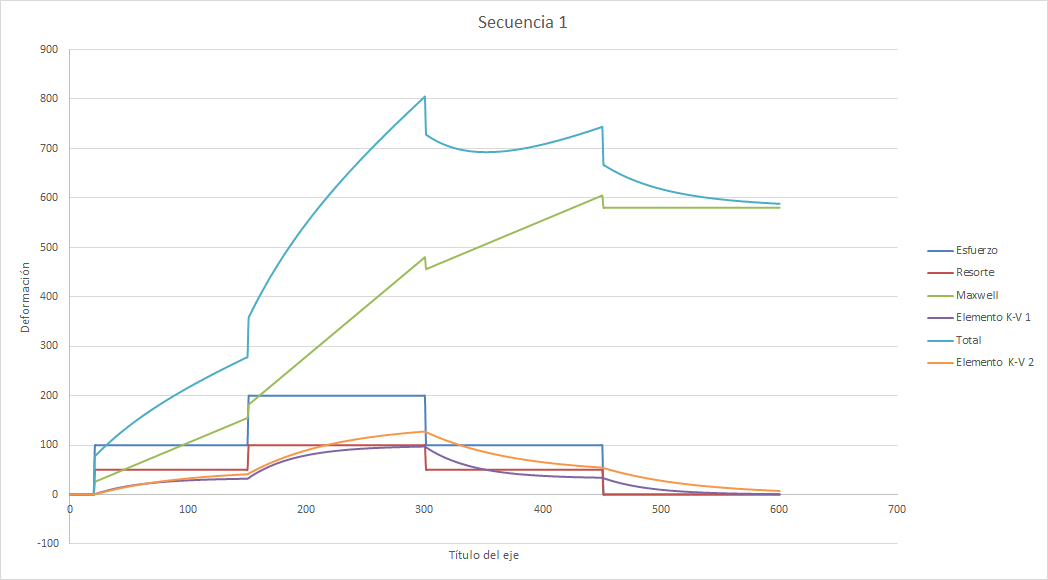

### secuencia 2

In [8]:
#Definir datos dados
#serie de tiempo
time_series=range(0,600+1)
#definir objetos de los elementos
#resorte 1
spring_1=spring(spring_1_E)
# elem de eklvin 1
kelvin_2=kelvin(E_2,visc_2)
# elem de kelvin 2
kelvin_3=kelvin(E_3,visc_3)
#embolo 4
piston_4=piston(visc_4)
#resorte 4
spring_4=spring(E_4)

In [9]:
#definir vectores de deformación en casa segundo(Resetear arrays y rellenar de nuevo)
elem_1=np.array([]) #resorte 1
elem_2=np.array([]) #kelvin 1 
elem_3=np.array([]) #kelvin 3
elem_4=np.array([]) #resorte 4
elem_5=np.array([]) #piston 4
total=np.array([])

In [10]:
counter_1=1
counter_2=1
counter_3=1
counter_4=1
for s in time_series:
    if 20>=s>=0:
        sigma=0
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,kelvin_2.get_defo(sigma,s))
        elem_3=np.append(elem_3,kelvin_3.get_defo(sigma,s))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,piston_4.get_defo(sigma,s))
        #captrura últimos valores de los elementos requeridos
        if s==20:
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
    if 150>=s>=21:
        sigma=200
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,last_2+kelvin_2.get_defo(sigma,counter_1)) #suma la deformación hasta 20s, en este caso 0
        elem_3=np.append(elem_3,last_3+kelvin_3.get_defo(sigma,counter_1))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,last_5+piston_4.get_defo(sigma,counter_1))        
        if s==150:
            #captrura últimos valores de los elementos requeridos (NO es necesario aquí)
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
            defo_150_elem_2=elem_2[-1]
            defo_150_elem_3=elem_3[-1]
        counter_1+=1  
    if 300>=s>=151:
        sigma=200
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,kelvin_2.get_defo(sigma,counter_1)) #suma la deformación hasta 20s , en este caso 0
        elem_3=np.append(elem_3,kelvin_3.get_defo(sigma,counter_1))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,piston_4.get_defo(sigma,counter_1))
        
        if s==300:
            #captrura últimos valores de los elementos requeridos (NO es necesario aquí)
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
            
        counter_1+=1   
    if 450>=s>=301:
        sigma=200
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        elem_2=np.append(elem_2,kelvin_2.get_defo(sigma,counter_1)) #suma la deformación hasta 20s, en este caso 0
        elem_3=np.append(elem_3,kelvin_3.get_defo(sigma,counter_1))
        elem_4=np.append(elem_4,spring_4.get_defo(sigma))
        elem_5=np.append(elem_5,piston_4.get_defo(sigma,counter_1))
        
        if s==450:
            #captrura últimos valores de los elementos requeridos (NO es necesario aquí)
            last_2=elem_2[-1]
            last_3=elem_3[-1]
            last_5=elem_5[-1]
            
        counter_1+=1   
    if 600>=s>=451:
        sigma=0       
        elem_1=np.append(elem_1,spring_1.get_defo(sigma))
        #Deformación inicial para elemento 23 es la que tenía en 450s
        elem_2=np.append(elem_2,kelvin_2.get_rec(last_2,counter_4)) #suma la deformación hasta 150s
        elem_3=np.append(elem_3,kelvin_3.get_rec(last_3,counter_4)) 
        
        elem_4=np.append(elem_4,spring_4.get_defo(sigma)) #se mantiene constante en el valor de la 
        elem_5=np.append(elem_5,last_5)    #deformación del émbolo cuando sigma es 0,  por que el émbolo no recupera, el resorte
                                           #recupera su longitud incial o sea no hay strain cuando sigma es 0

        counter_4+=1
#obtener el total a partir de la suma de deformaciones
total=elem_1+elem_2+elem_3+elem_4+elem_5

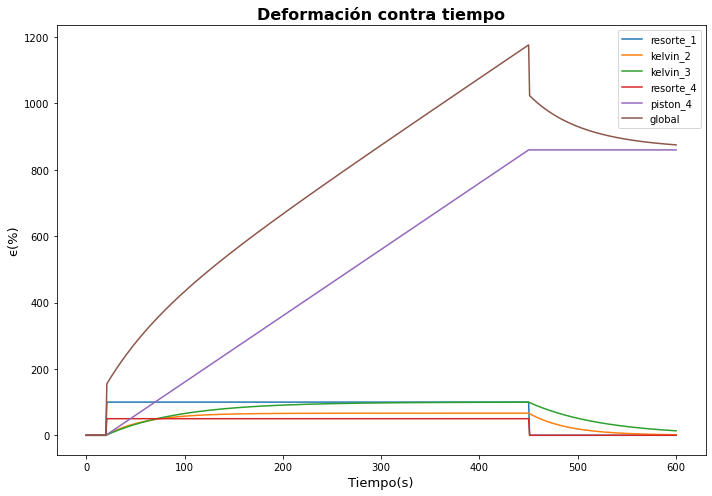

In [11]:
#Graficar 
plt.figure(figsize=(10,7))
plt.plot(time_series,elem_1,label="resorte_1")
plt.plot(time_series,elem_2,label="kelvin_2")
plt.plot(time_series,elem_3,label="kelvin_3")
plt.plot(time_series,elem_4,label="resorte_4")
plt.plot(time_series,elem_5,label="piston_4")
plt.plot(time_series,total,label="global")

plt.legend(loc='upper right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.tight_layout()
plt.show()

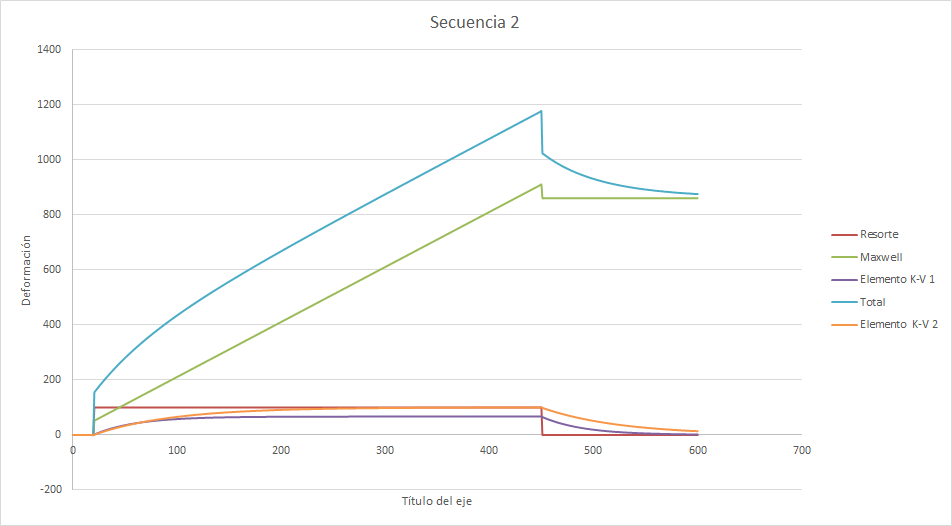